#Shoopala Nambahu 9662065 -Exploratory Data Analysis

# 1. Data Preprocessing

### Importing Modules

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from seaborn import regplot  # import regplot function

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
warnings.filterwarnings('ignore')

### Reading data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dropout.csv')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Exploring the data types

In [ ]:
#checking for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
#Counting null values
df.isnull().sum().sum()

0

In [ ]:
#Counting null values
df.isnull().sum().sum()

0

# 2. Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

import warnings
warnings.filterwarnings('ignore')

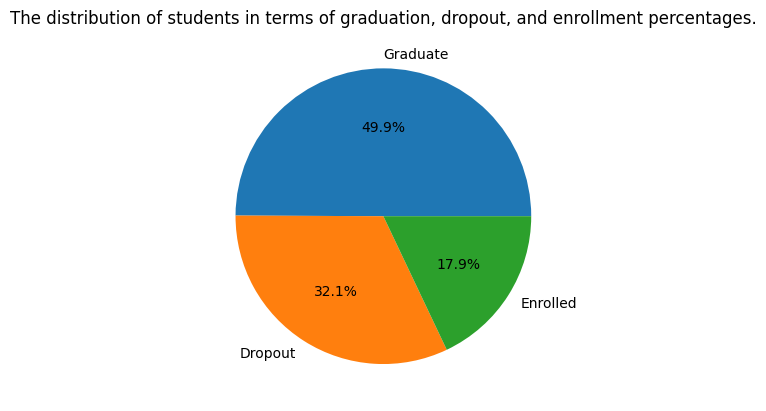

In [ ]:
#The distribution of students in terms of graduation, dropout, and enrollment percentages.
df_dist = df['Target'].value_counts()

plt.pie(df_dist, labels=df_dist.index, autopct='%1.1f%%')
plt.title('The distribution of students in terms of graduation, dropout, and enrollment percentages.')
plt.show()

In [ ]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Under the target feature, there is a total of 2,209 students who graduated, 1,421 students who dropped out, and 794 students who are enrolled.

### Demographics

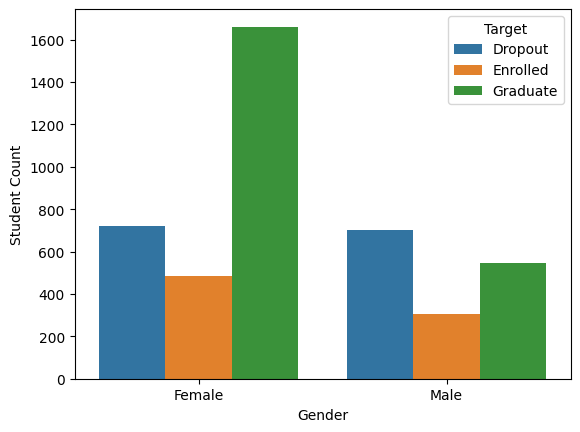

In [ ]:
#Information categorized by gender.
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Student Count')
plt.show()

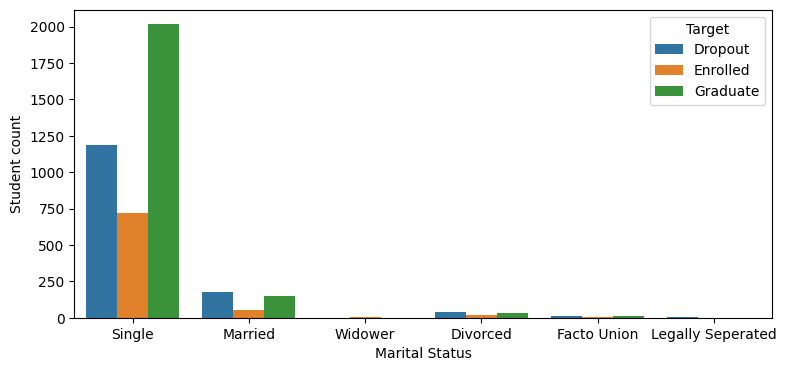

In [ ]:
#Number of students per matital status

plt.figure(figsize=(9,4))
sns.countplot(data=df, x='Marital status', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Student count')
plt.show()

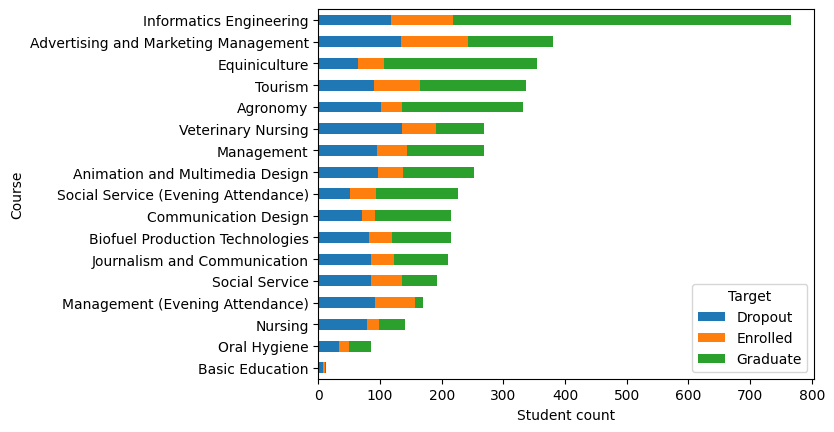

In [ ]:
df_course = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns='Target', index='Course', values=0)

# Rename the index of the DataFrame
df_course = df_course.rename(index={171:'Biofuel Production Technologies',9254:'Animation and Multimedia Design',9070:'Social Service (Evening Attendance)',9773:'Agronomy',8014:'Communication Design',9991:'Veterinary Nursing',9500:'Informatics Engineering',9238:'Equiniculture',9670:'Management',9853:'Social Service',9085:'Tourism',9130:'Nursing',9556:'Oral Hygiene',9147:'Advertising and Marketing Management',9003:'Journalism and Communication',33:'Basic Education',9119:'Management (Evening Attendance)'})

df_course_tot = df_course.sum(axis=1)
df_course_sort = df_course_tot.sort_values(ascending=True)
df_course.loc[df_course_sort.index].plot(kind='barh', stacked=True)

plt.xlabel('Student count')
plt.show()

Informatics Engineering course produced the highest number of graduates while Advertising and Marketing Management and Veterinary Nursing course has the highest number of droputs.

<Axes: xlabel='Age at enrollment', ylabel='Count'>

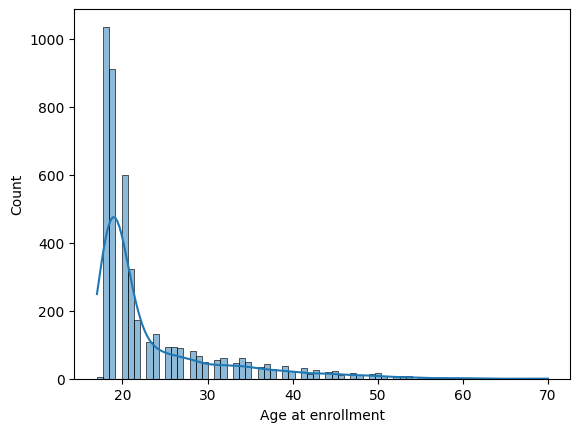

In [ ]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df['Age at enrollment'], kde=True)

The distribution of age at enrolment is positively skewed, indicating that the majority of students enrolled at a relatively young age. The mean age at enrolment is approximately 23 years old, with the most frequent age range falling between 19 to 25 years old.

###Socioeconomic Status

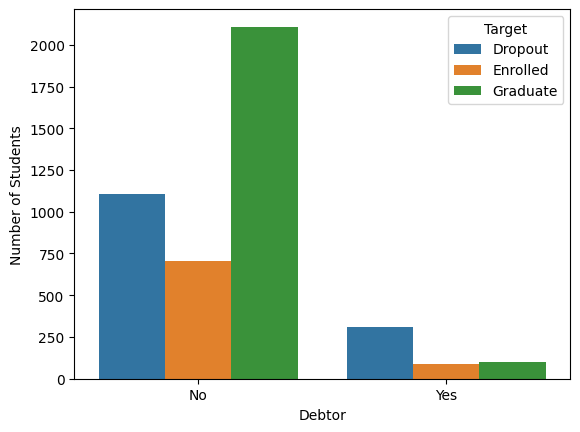

In [ ]:
sns.countplot(data=df, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

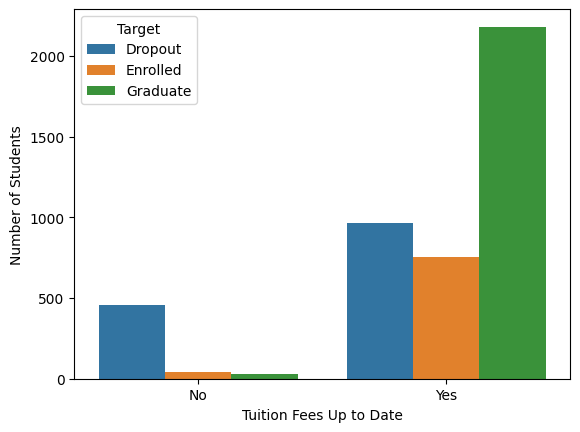

In [ ]:
sns.countplot(data=df, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

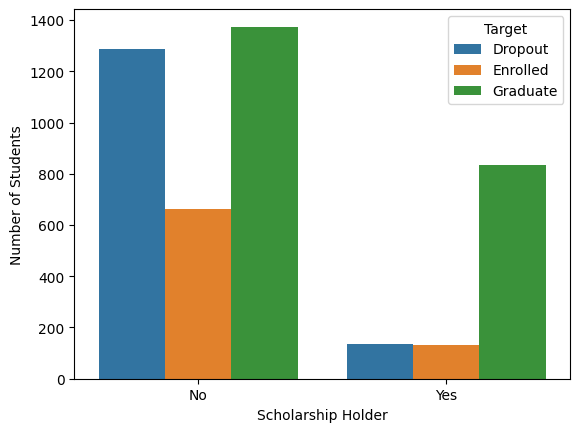

In [ ]:
sns.countplot(data=df, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()

Students who receive scholarships experience the lowest dropout rates. This can be attributed to the requirement for scholarship recipients to maintain their eligibility by attending college.

In terms of other socioeconomic status, most students who graduated and dropped are non-debtors and their tuition fees are up to date. Yet, these students are non-scholarship holders.

#3. Feature Engineering

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)


*Three unique classifications are displayed in the "Target" column: "Dropout," "Graduate," and "Enrolled." The code modifies the values in the 'Target' column. Firstly, it changes the values 'Dropout', 'Enrolled',  and 'Graduate' to '0', '1', and '2', respectively, using the map() function. Afterwards, it converts the 'Target' column to the integer data type. This conversion will make our analysis simpler.*

#Feature Importance

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.131092
31                Curricular units 2nd sem (grade)    0.111236
24             Curricular units 1st sem (approved)    0.097350
25                Curricular units 1st sem (grade)    0.063543
29          Curricular units 2nd sem (evaluations)    0.043673
16                         Tuition fees up to date    0.043162
12                                 Admission grade    0.040832
6                   Previous qualification (grade)    0.038131
23          Curricular units 1st sem (evaluations)    0.037368
19                               Age at enrollment    0.035585
3                                           Course    0.032709
11                             Father's occupation    0.028160
10                             Mother's occupation    0.025980
35                                             GDP    0.023261
33                               Unemployment rate    0

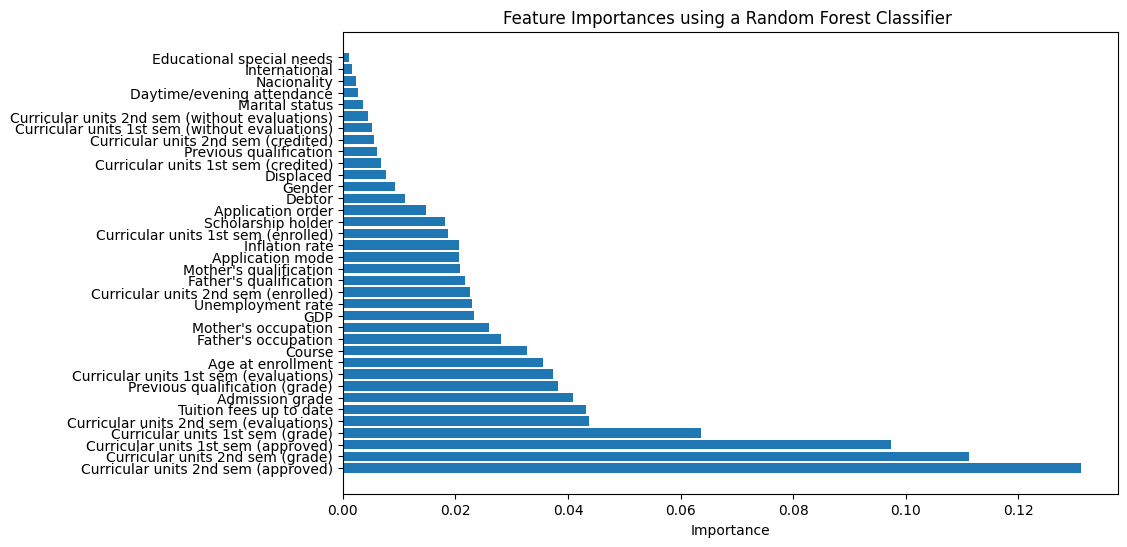

In [ ]:
# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances using a Random Forest Classifier ')
plt.show()

                                           Feature  Coefficient  \
31                Curricular units 2nd sem (grade)    -0.109363   
25                Curricular units 1st sem (grade)    -0.080502   
30             Curricular units 2nd sem (approved)    -0.065543   
24             Curricular units 1st sem (approved)    -0.055156   
19                               Age at enrollment     0.040843   
29          Curricular units 2nd sem (evaluations)    -0.021618   
23          Curricular units 1st sem (evaluations)    -0.014004   
12                                 Admission grade    -0.010918   
22             Curricular units 1st sem (enrolled)    -0.010764   
5                           Previous qualification    -0.010325   
28             Curricular units 2nd sem (enrolled)    -0.010271   
9                           Father's qualification    -0.010125   
1                                 Application mode     0.007637   
7                                      Nacionality     0.00592

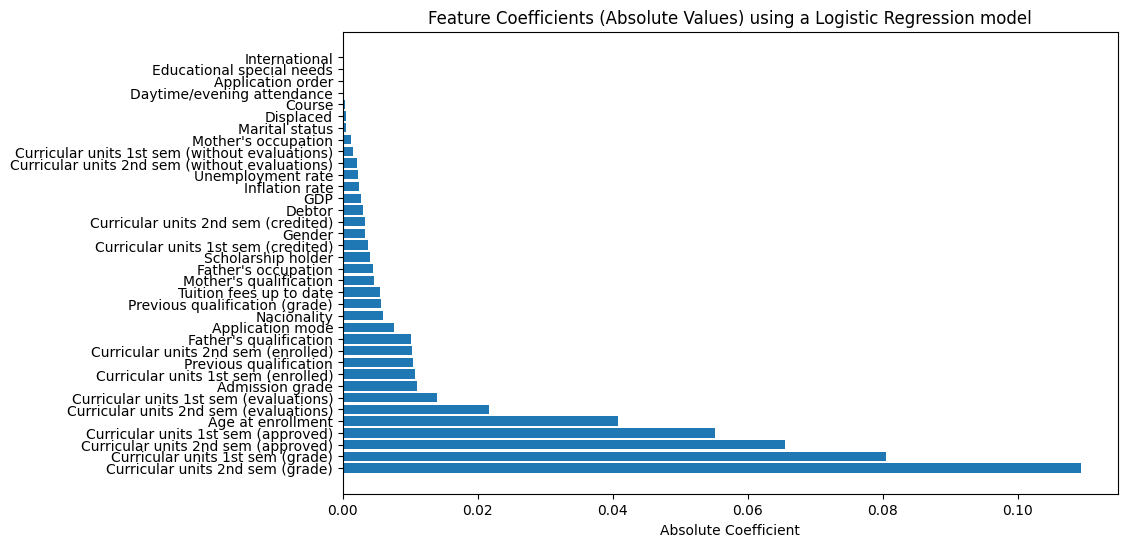

In [ ]:
# Initialize a Logistic Regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Get feature coefficients
feature_coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_coefficients})

# Sort the features by absolute coefficient value in descending order
feature_coefficient_df['Absolute_Coefficient'] = feature_coefficient_df['Coefficient'].abs()
feature_coefficient_df = feature_coefficient_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the feature coefficients
print(feature_coefficient_df)

# Plotting the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficient_df['Feature'], feature_coefficient_df['Absolute_Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Coefficients (Absolute Values) using a Logistic Regression model')
plt.show()

                                           Feature  Importance
30             Curricular units 2nd sem (approved)    0.560906
16                         Tuition fees up to date    0.073415
24             Curricular units 1st sem (approved)    0.047182
28             Curricular units 2nd sem (enrolled)    0.032455
31                Curricular units 2nd sem (grade)    0.030463
29          Curricular units 2nd sem (evaluations)    0.030257
23          Curricular units 1st sem (evaluations)    0.027717
19                               Age at enrollment    0.024307
3                                           Course    0.024196
22             Curricular units 1st sem (enrolled)    0.023701
10                             Mother's occupation    0.017035
18                              Scholarship holder    0.014971
12                                 Admission grade    0.010713
6                   Previous qualification (grade)    0.010425
35                                             GDP    0

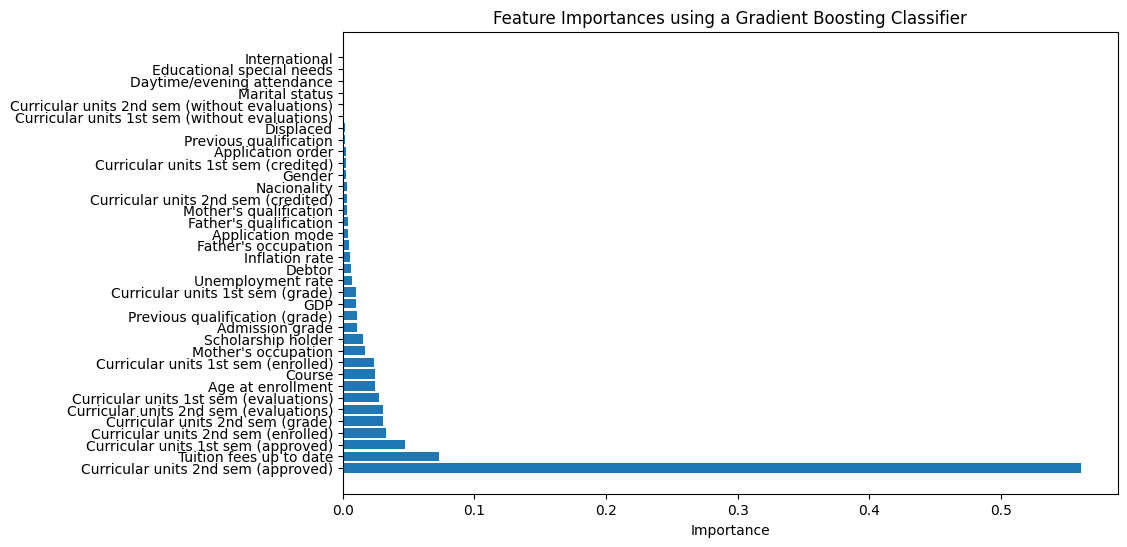

In [ ]:
# Initialize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances using a Gradient Boosting Classifier')
plt.show()

### Support Vector Machines (SVM) don't provide a direct measure of feature importance like some other models. However, you can get insights into the importance of features by analyzing the support vectors and their corresponding coefficients.


                                           Feature  Coefficient
16                         Tuition fees up to date    34.000000
30             Curricular units 2nd sem (approved)    17.871384
28             Curricular units 2nd sem (enrolled)    16.030868
15                                          Debtor    10.887949
27             Curricular units 2nd sem (credited)     7.199591
13                                       Displaced     6.173993
29          Curricular units 2nd sem (evaluations)     4.705847
17                                          Gender     4.250009
21             Curricular units 1st sem (credited)     3.743285
20                                   International     3.305611
0                                   Marital status     2.859234
33                               Unemployment rate     2.848276
24             Curricular units 1st sem (approved)     2.715077
32  Curricular units 2nd sem (without evaluations)     2.614524
31                Curricular units 2nd s

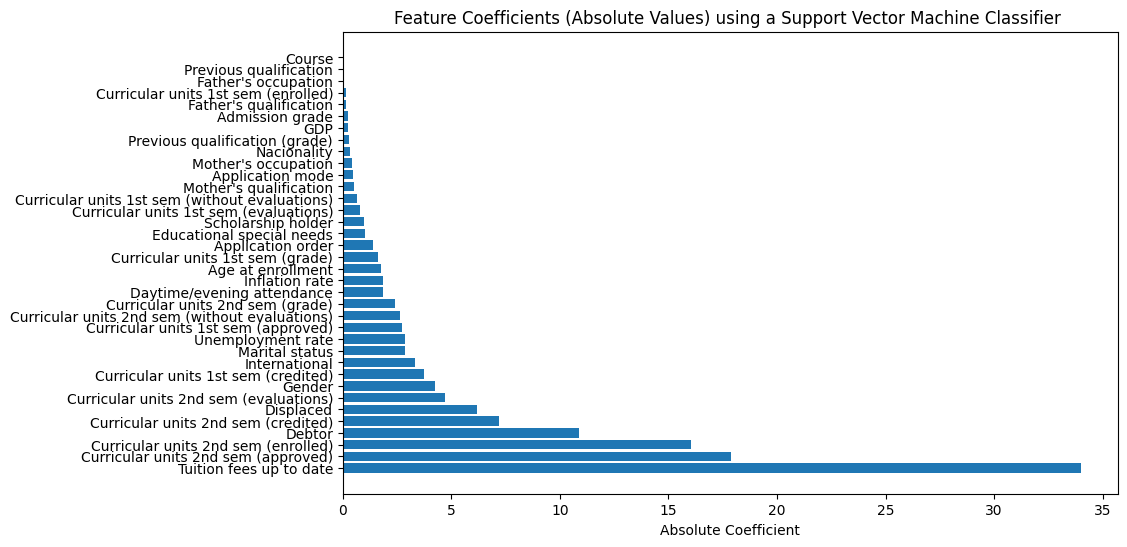

In [ ]:
# Initialize a Support Vector Machine Classifier
svm_model = SVC(kernel='linear', C=1)  # You can choose different kernel functions and hyperparameters

# Train the model
svm_model.fit(X_train, y_train)

# Get coefficients (weights) for each feature
feature_coefficients = svm_model.coef_

# Calculate the absolute values of the coefficients for ranking
absolute_coefficients = abs(feature_coefficients[0])

# Create a DataFrame to display feature coefficients
feature_coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': absolute_coefficients})

# Sort the features by coefficient value in descending order
feature_coefficient_df = feature_coefficient_df.sort_values(by='Coefficient', ascending=False)

# Display the feature coefficients
print(feature_coefficient_df)

# Plotting the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficient_df['Feature'], feature_coefficient_df['Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Feature Coefficients (Absolute Values) using a Support Vector Machine Classifier ')
plt.show()